In [1]:
import pandas as pd
import pandas_profiling as ppf
import seaborn as sns
from pandasgui import show
import pandasgui
import numpy as np

In [2]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [3]:
rawcsv = pd.read_csv('/Users/jeandre/DataScience874/healthcare-dataset-stroke-data.csv')

In [4]:
rawcsv.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [5]:
rawcsv.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [6]:
rawcsv.profile_report()

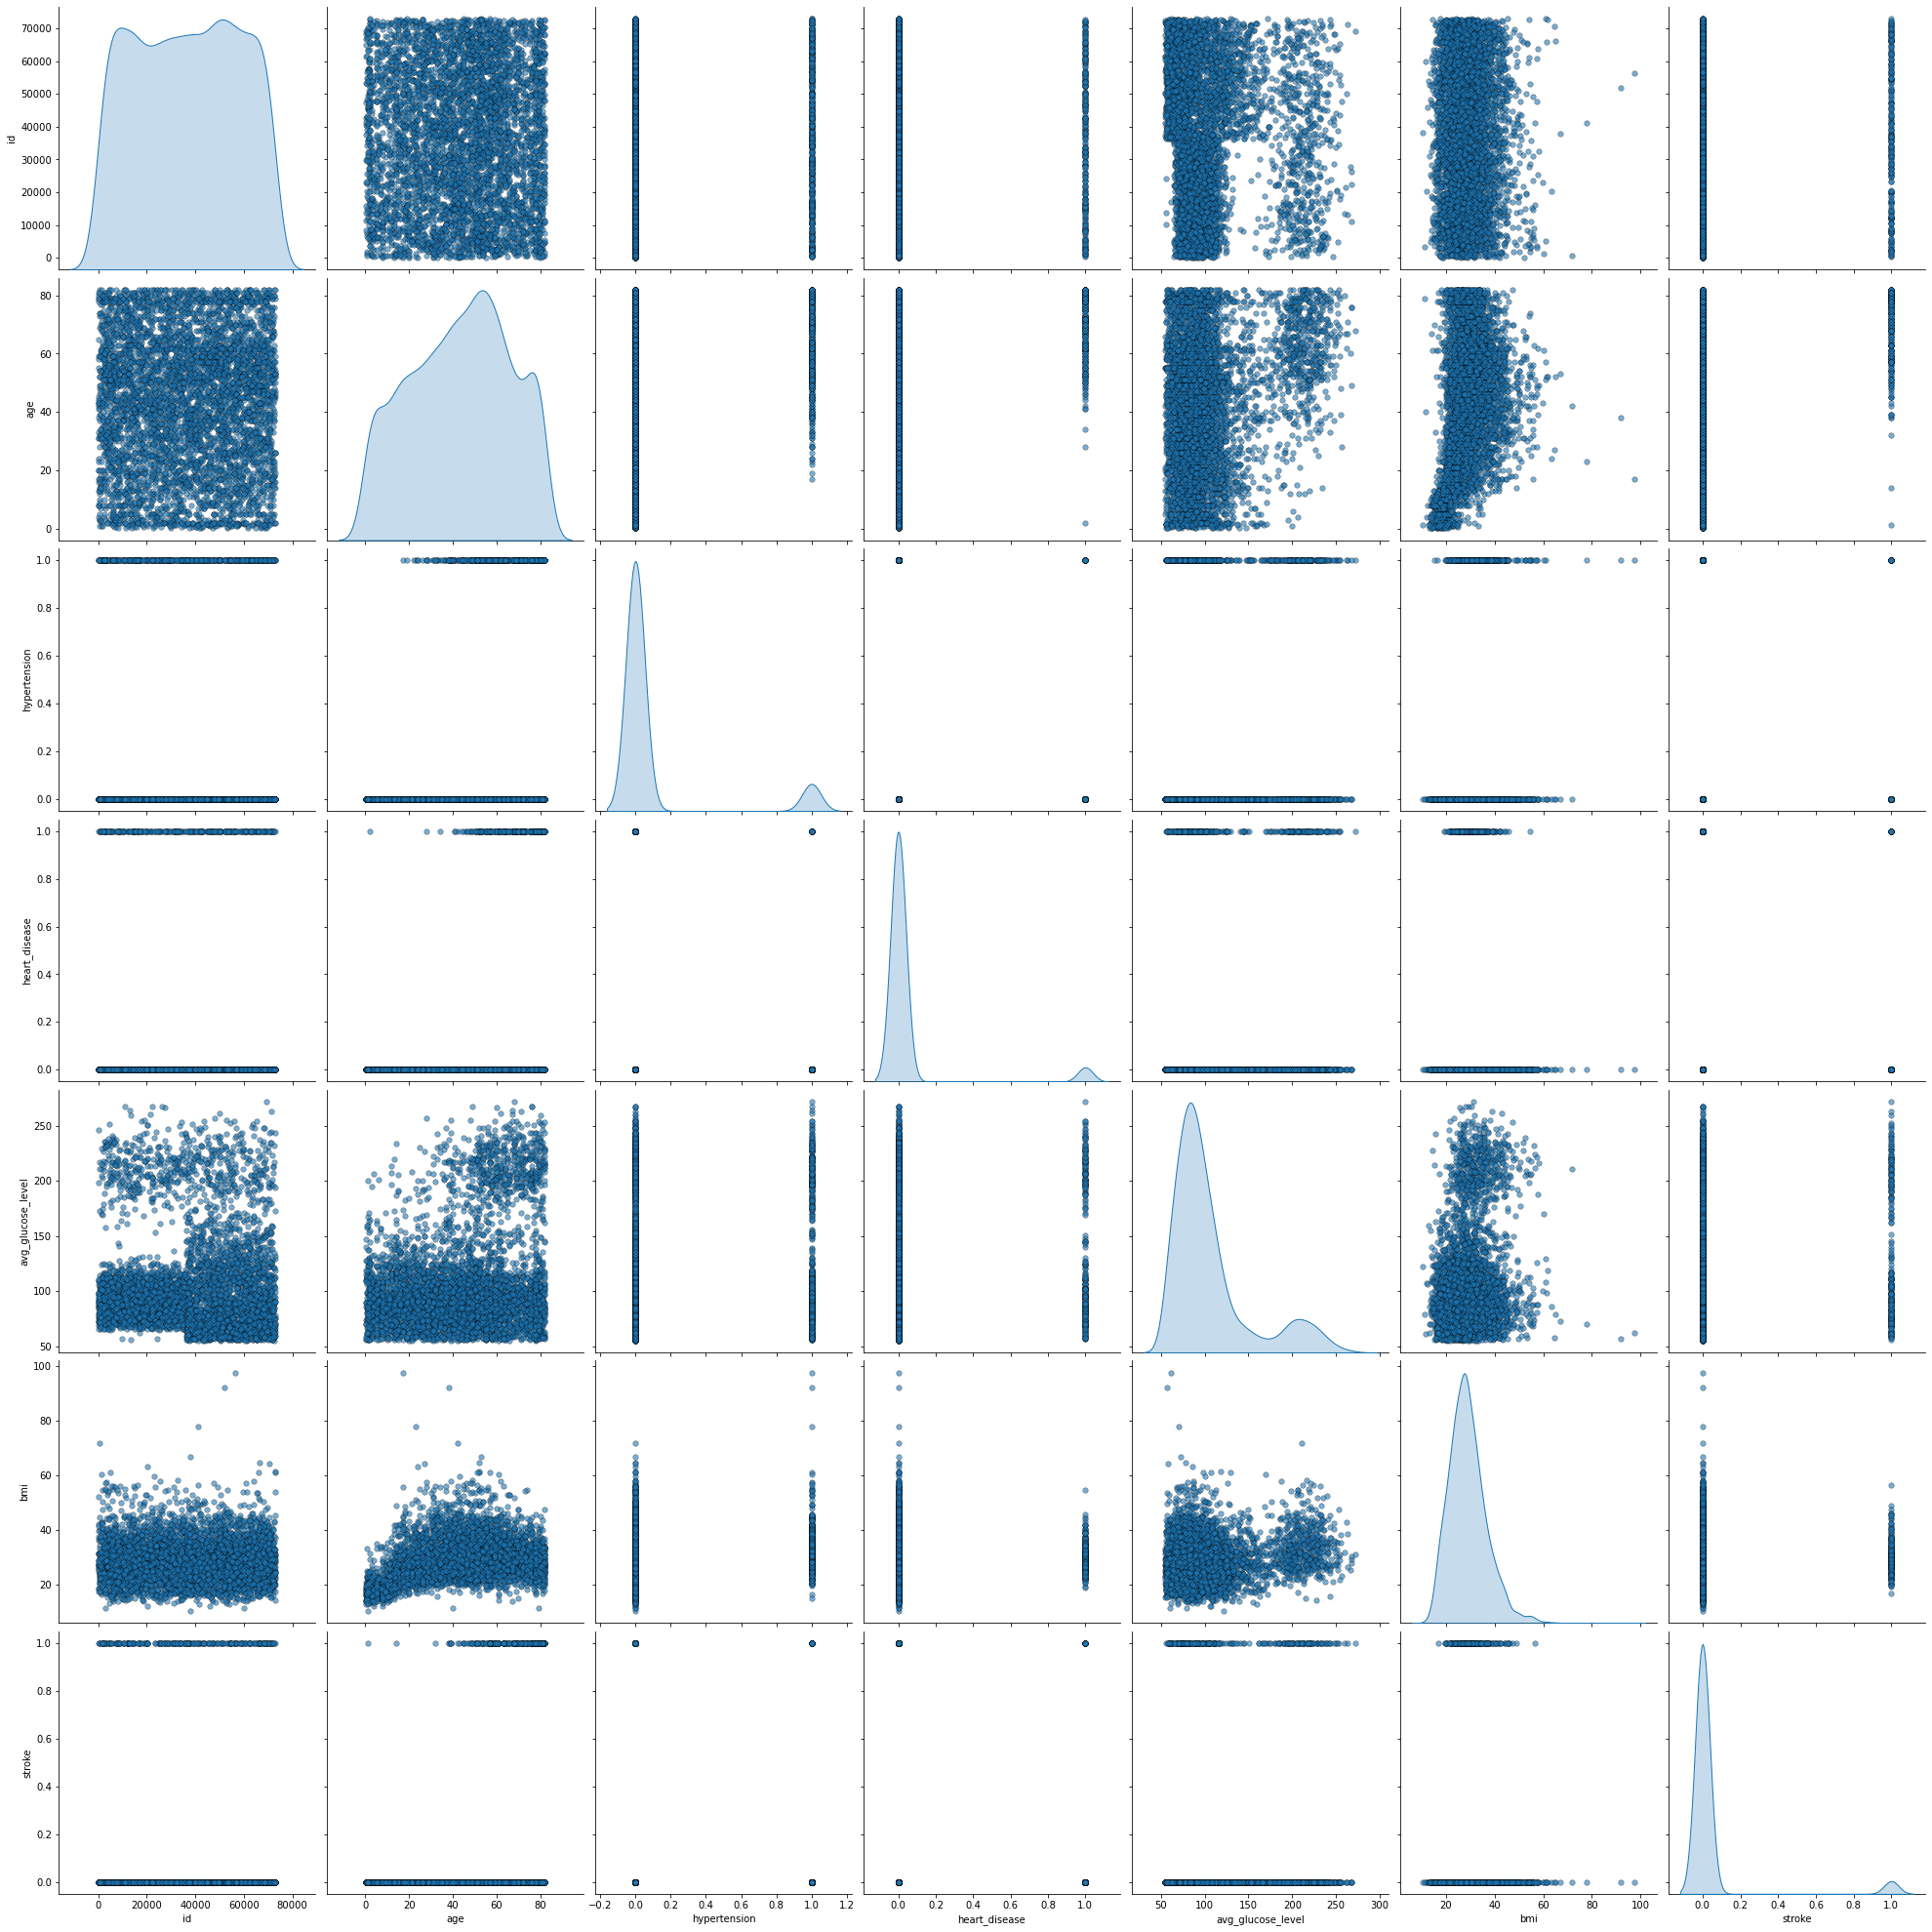

In [7]:
sns.pairplot(rawcsv, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'},height = 4)

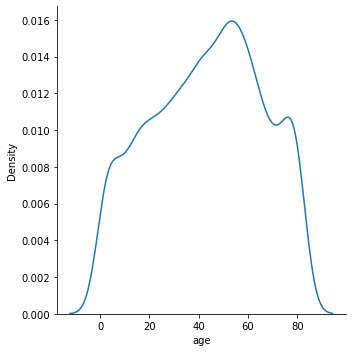

In [8]:
sns.displot(data = rawcsv, x = "age", kind = "kde" )

NameError: name 'plt' is not defined

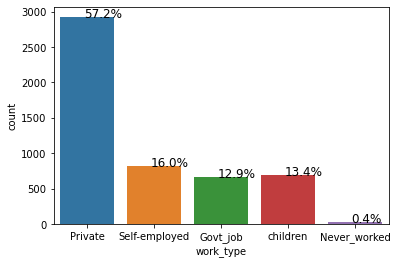

In [9]:
ax = sns.countplot(data = rawcsv, x = "work_type" )
without_hue(ax,rawcsv.smoking_status)

In [10]:
ages = rawcsv["age"]

In [11]:
(ages<3).sum()

175

In [12]:
rawcsv.loc[(rawcsv['bmi'] >50 )]

id  gender   age  hypertension  heart_disease ever_married  \
113   41069  Female  45.0             0              0          Yes   
254   32257  Female  47.0             0              0          Yes   
258   28674  Female  74.0             1              0          Yes   
270   72911  Female  57.0             1              0          Yes   
333    1703  Female  52.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4650  68074    Male  54.0             0              0          Yes   
4779  65892  Female  58.0             0              0          Yes   
4838   5131  Female  51.0             0              0          Yes   
4906  72696  Female  53.0             0              0          Yes   
4952  16245    Male  51.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
113         Private          Rural             224.10  56.6     never smoked   
254         Private          Urban             210.95  50.1          Unknown   
258   Self-employed          Urban             205.84  54.6     never smoked   
270         Private          Rural             129.54  60.9           smokes   
333         Private          Urban              82.24  54.7  formerly smoked   
...             ...            ...                ...   ...              ...   
4650        Private          Rural             100.47  50.2  formerly smoked   
4779  Self-employed          Urban              66.71  51.7     never smoked   
4838        Private          Urban             107.72  60.9          Unknown   
4906        Private          Urban              70.51  54.1     never smoked   
4952  Self-employed          Rural             211.83  56.6     never smoked   

      stroke  
113        1  
254        0  
258        0  
270        0  
333        0  
...      ...  
4650       0  
4779       0  
4838       0  
4906       0  
4952       0  

[79 rows x 12 columns]

In [13]:
firstclean = rawcsv.dropna()

In [14]:
firstclean['bmi'].clip(0,50)

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [15]:
firstclean = firstclean[firstclean.gender != 'Other']

In [16]:
firstclean.profile_report()

In [17]:
gui = show(firstclean)